In [5]:
import matplotlib.pyplot as plt
import numpy as np



900.0 -220000 -200.0
780.0 -540000.0 -120.0
708.0 -655200.0 -72.0
664.8 -696672.0 -43.2
638.88 -711601.9200000002 -25.919999999999984
623.328 -716976.6912 -15.552
613.9968 -718911.608832 -9.33119999999999
608.39808 -719608.17917952 -5.598720000000004
605.038848 -719858.9445046273 -3.35923200000002
603.0233088 -719949.2200216657 -2.015539200000012
601.81398528 -719981.7192077998 -1.209323519999998
601.088391168 -719993.4189148078 -0.7255941119999989
600.6530347008 -719997.6308093308 -0.4353564672000175
600.39182082048 -719999.147091359 -0.26121388032001963
600.235092492288 -719999.6929528891 -0.15672832819200266
600.1410554953728 -719999.8894630402 -0.0940369969152016
600.0846332972237 -719999.9602066946 -0.056422198149130055
600.0507799783343 -719999.9856744099 -0.03385331888948713
600.0304679870005 -719999.9948427877 -0.020311991333710467
600.0182807922004 -719999.9981434034 -0.012187194800208091
600.0109684753202 -719999.9993316252 -0.0073123168801430445
600.0065810851921 -719999.999

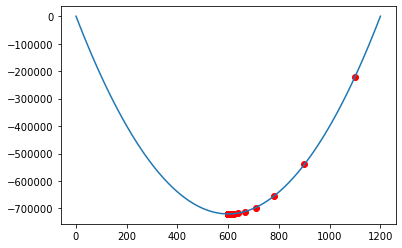

In [41]:
#zadatak1
def gradient_descent(x,y):
    no_iter = 30
    learning_rate = 0.1
    start = 1100
    
    vector = start
    for i in range(no_iter):
        y_predict = -2400*vector + 2*vector**2
        derivation = 2400 - 4*vector
        difference = learning_rate*derivation #derivation je vec negativan
        last = vector
        plt.plot(vector, y_predict, 'ro')
        vector += difference;
        print(vector, y_predict, difference)
        if(abs(vector - last) < 0.001):
            print("Minimum is at: ", vector, ", after ", i, " iterations.")
            break
        

x = np.linspace(0,1200, 100)
y = -2400*x + 2*x**2

gradient_descent(x,y)
plt.plot(x,y)
plt.show()



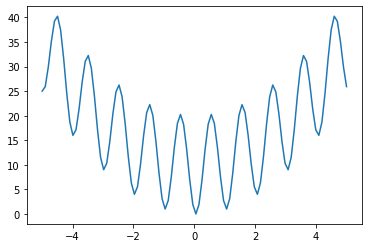

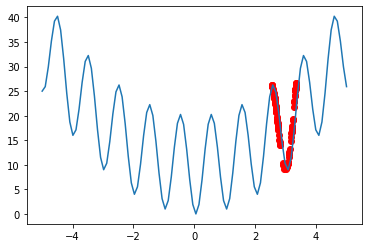

In [42]:
#zadatk2
#Rastriginova funkcija
def rastrigin_function(A, w, x, n, step):
    rastrigin = np.array([])
    xi = x
    for i in range(n):
        amp = A
        f_x= xi**2 - A*(np.cos(w*xi))
        #print("Rastrigin: ", f_x+amp, xi)
        xi += step

        rastrigin = np.append(rastrigin, amp + f_x)
    return rastrigin

rastrigin = rastrigin_function(10, 2*np.pi, -5, 100, 0.1)
X = np.linspace(-5,5, 100)
plt.plot(X, rastrigin)
plt.show()

#cost function
def descent_function(A, x0, nSteps, alfa):
  for i in range(nSteps):
    y_predict = A + x0**2 - A* (np.cos(2*np.pi*x0))
    derivation = 2*x0 + A*2*np.pi*np.sin(2*np.pi*x0)
    #print("Descent: ",x0, y_predict)
    plt.plot(x0,y_predict, 'ro')
    pomak = alfa *derivation
    x0 = x0 - pomak
  return 

descent_function(10, 3.2, 100, 0.01)
plt.plot(X,rastrigin)
plt.show()
        

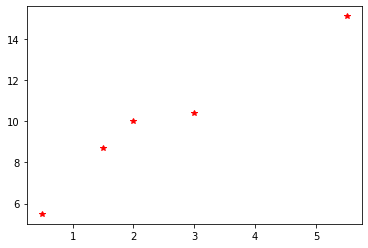

Theta1:  1.7801274828754687 Theta2:  5.488829587963103


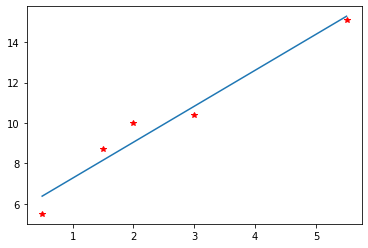

In [43]:
#Regresija

x = np.array([0.5, 1.5, 2, 3, 5.5])
y = np.array([5.5, 8.7, 10, 10.4, 15.1])

plt.plot(x,y, "r*")
plt.show()

#gradienta metoda
def descent_function(x,y, theta1, theta2, n, alfa):
  parcF_t1 = 0
  parcF_t2 = 0
  for _ in range(n):
    for i in range(len(x)):
      parcF_t1 += (theta1*x[i] + theta2 - y[i])*x[i]
      parcF_t2 += (theta1*x[i] + theta2 - y[i])
    parcF_t1 = 1/len(x) * parcF_t1
    parcF_t2 = 1/len(x) * parcF_t2

    t1 = theta1 - alfa* parcF_t1
    t2 = theta2 - alfa* parcF_t2

    theta1 = t1
    theta2 = t2
    #print("Theta1: ", theta1, "Theta2: ", theta2)

  return theta1,theta2

theta1, theta2 = descent_function(x,y, 0,0, 2000, 0.01)
print("Theta1: ", theta1, "Theta2: ", theta2)
#hipoteza
X = np.linspace(min(x), max(x), 100)
Y = theta1*X + theta2
plt.plot(x,y, "r*")
plt.plot(X,Y)
plt.show()

In [1]:
#putna torba
#a) uvjet: postoji samo po jedan primjerak različitih predmeta
import numpy as np
import matplotlib.pyplot as plt
import random as rand

def fitness_function(weight, value, populacija, ogranicenje):
    fitness = np.empty(populacija.shape[0])
    print("Shape populacije: ", populacija.shape[0])
    for i in range(populacija.shape[0]):
        suma1 = np.sum(populacija[i]*value)
        suma2 = np.sum(populacija[i]*weight)
        if suma2 <= ogranicenje:
            fitness[i] = suma1
        else:
            fitness[i] = 0
    return fitness.astype(int)

def selection_function(fitness, broj_roditelja, populacija):
    fitness = list(fitness)
    roditelji = np.empty((broj_roditelja, populacija.shape[1]))
    for i in range(broj_roditelja):
        najveci_index_fitness = np.where(fitness == np.max(fitness))
        roditelji[i,:] = populacija[najveci_index_fitness[0][0],:]
        fitness[najveci_index_fitness[0][0]] = -1
    return roditelji

def crossover_function(roditelji, broj_potomaka):
    potomci = np.empty((broj_potomaka, roditelji.shape[1]))
    tocka_crossovera = int(roditelji.shape[1]/2)
    rang_crossovera = 0.9
    i = 0
    while( roditelji.shape[0] < broj_potomaka):
        roditelj1_index = i%roditelji.shape[0]
        roditelj2_index = (i+1)%roditelji.shape[0]
        x = rand.random()
        if(x > rang_crossovera):
            break
        roditelj1_index = i%roditelji.shape[0]
        roditelj2_index = (i+1)%roditelji.shape[0]
        potomci[i, 0:tocka_crossovera] = roditelji[roditelj1_index, 0: tocka_crossovera]
        potomci[i, tocka_crossovera:] = roditelji[roditelj2_index, tocka_crossovera:]
        i = +1
    return potomci
 
def mutation_function(potomci):
    mutanti = np.empty((potomci.shape))
    mutacijska_usljednost = 0.2
    for i in range(mutanti.shape[0]):
        random_vrijednost = rand.random()
        mutanti[i,:] = potomci[i, :]
        if random_vrijednost > mutacijska_usljednost:
            continue
        int_random_vrijednost = rand.randint(0, potomci.shape[1]-1)
        if mutanti[i, int_random_vrijednost] == 0:
            mutanti[i, int_random_vrijednost] = 1
        else:
            mutanti[i, int_random_vrijednost] = 0
    return mutanti
    
def optimization_function(weight, value, populacija, velicina_populacije, broj_generacija, ogranicenje):
    parametri, fitness_povijest = [], []
    broj_roditelja = 2#int(velicina_populacije[0]/2)
    broj_potomaka = velicina_populacije[0] - broj_roditelja
    for i in range(broj_generacija):
        fitness = fitness_function(weight, value, populacija, ogranicenje)
        print("Fitness: ",fitness)
        fitness_povijest.append(fitness)
        roditelji = selection_function(fitness, broj_roditelja, populacija)
        print("Selekcija: \n", roditelji)
        potomci = crossover_function(roditelji, broj_potomaka)
        print("Potomci: \n", potomci)
        mutanti = mutation_function(potomci)
        print("Mutanti: \n", mutanti)
        populacija[0: roditelji.shape[0], :] = roditelji
        populacija[roditelji.shape[0]:, :] = mutanti
    print("Zadnja generacija: \n", populacija)
    fitness_posljednja_generacija = fitness_function(weight, value, populacija, ogranicenje)
    print("Fitness zadnje generacije: \n", fitness_posljednja_generacija)
    max_fitness = np.where(fitness_posljednja_generacija == np.max(fitness_posljednja_generacija))
    parametri.append(populacija[max_fitness[0][0], :])
    return parametri, fitness_povijest
    
tezina = np.array([12, 2,1,4,1]) #kg
vrijednost = np.array([4,2,1,10,2]) #$

ogranicenje = 15

#pronaći maksimum vrijednosti za ogranicenje od 15 kg

print("Popis predmeta i njihovih vrijednosti: ")
for i in range(len(tezina)):
    print(i, ". ", tezina[i], " kn, ", vrijednost[i], " $.")
    

rjesenja_prema_populaciji = 3
velicina_populacije = (rjesenja_prema_populaciji, len(tezina))
print("Velicina populacije: ", velicina_populacije)
    
inicijalna_populacija = np.random.randint(2, size = velicina_populacije )
inicijalna_populacija = inicijalna_populacija.astype(int)

broj_generacija = 10
print("Inicijalna populacija: \n", inicijalna_populacija)
    
#fitness = fitness_function(tezina, vrijednost, inicijalna_populacija, ogranicenje)
#print("Fitness: ",fitness)
#roditelji = selection_function(fitness, 2, inicijalna_populacija)
#print("Selekcija: \n", roditelji)
#potomci = crossover_function(roditelji, 2)
#print("Potomci: \n", potomci)
#mutanti = mutation_function(potomci)
#print("Mutanti: \n", mutanti)

parametri, fitness_povijest = optimization_function(tezina, vrijednost, inicijalna_populacija, velicina_populacije, broj_generacija, ogranicenje)
print("Optimizirani parametri za dani ulaz su: \n", parametri)
odabrane_vrijednosti = len(tezina)* parametri
print("Odabrani parametri koji ce maksimizirat ogranicenje bez prelaska te granice su: \n")
print(odabrane_vrijednosti)


Popis predmeta i njihovih vrijednosti: 
0 .  12  kn,  4  $.
1 .  2  kn,  2  $.
2 .  1  kn,  1  $.
3 .  4  kn,  10  $.
4 .  1  kn,  2  $.
Velicina populacije:  (3, 5)
Inicijalna populacija: 
 [[1 1 0 1 0]
 [1 0 1 0 0]
 [0 0 1 0 1]]
Shape populacije:  3
Fitness:  [0 5 3]
Selekcija: 
 [[1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]
Potomci: 
 [[0.   0.25 0.5  0.75 1.  ]]
Mutanti: 
 [[0.   0.25 0.   0.75 1.  ]]
Shape populacije:  3
Fitness:  [5 3 2]
Selekcija: 
 [[1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]
Potomci: 
 [[0.   0.25 0.   0.75 1.  ]]
Mutanti: 
 [[0.   0.25 0.   0.75 1.  ]]
Shape populacije:  3
Fitness:  [5 3 2]
Selekcija: 
 [[1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]
Potomci: 
 [[0.   0.25 0.   0.75 1.  ]]
Mutanti: 
 [[0.   0.25 0.   0.75 1.  ]]
Shape populacije:  3
Fitness:  [5 3 2]
Selekcija: 
 [[1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]
Potomci: 
 [[0.   0.25 0.   0.75 1.  ]]
Mutanti: 
 [[0.   0.25 0.   0.75 1.  ]]
Shape populacije:  3
Fitness:  [5 3 2]
Selekcija: 
 [[1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1.]]
Poto